In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [183]:
import nbimporter
import Data_Story_telling_and_Inferential_Stats as DLS
reload(DLS)

Importing Jupyter notebook from Data_Story_telling_and_Inferential_Stats.ipynb


<module 'Data_Story_telling_and_Inferential_Stats' from 'Data_Story_telling_and_Inferential_Stats.ipynb'>

In [215]:
df_train=pd.read_csv('train_data')
df_test=pd.read_csv('test_data')
df_validate=pd.read_csv('validate_data')
full_df=pd.read_csv('final_data')

In [216]:
DLS.drop_irelevants(df_train)
DLS.drop_irelevants(df_test)
DLS.drop_irelevants(df_validate)
DLS.drop_irelevants(full_df)
new_list=DLS.divide_int_float_strings(df_train)[0]
dict_transform=DLS.better_relations(df_train,new_list)[1]
df_train=DLS.transform_data(df_train,dict_transform)
df_test=DLS.transform_data(df_test,dict_transform)
df_validate=DLS.transform_data(df_validate,dict_transform)
full_df=DLS.transform_data(full_df,dict_transform)

In [217]:
from sklearn.feature_extraction.text import CountVectorizer
def turn_into_list(feature):
    vectorizer = CountVectorizer(min_df=0)
    vectorizer.fit_transform(full_df[feature])
    x=vectorizer.transform(df_train[feature])
    df_train[feature]=x.toarray().tolist()
    X=vectorizer.transform(df_test[feature])
    df_test[feature]=X.toarray().tolist()
    x_validate=vectorizer.transform(df_validate[feature])
    df_validate[feature]=x_validate.toarray().tolist()
turn_into_list('genres')
turn_into_list('plot_keywords')

In [219]:
X_train=df_train.drop('gross', axis = 1)
X_test = df_test.drop('gross', axis = 1)
x_validate=df_validate.drop('gross', axis = 1)
X_full=full_df.drop('gross', axis = 1)
Y_full=full_df.gross
Y_train=df_train.gross
Y_test=df_test.gross
y_validate=df_validate.gross

In [221]:
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.cross_validation import train_test_split
full_dict = full_df.to_dict(orient='records')
train_dict = X_train.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')
validate_dict=x_validate.to_dict(orient='records')
vectorizer=DV( sparse = False )
vec=vectorizer.fit(full_dict)
Xtrain=vec.transform(train_dict)
Xtest=vec.transform(test_dict)
Xvalidate=vec.transform(validate_dict)

In [211]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(Xtrain,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

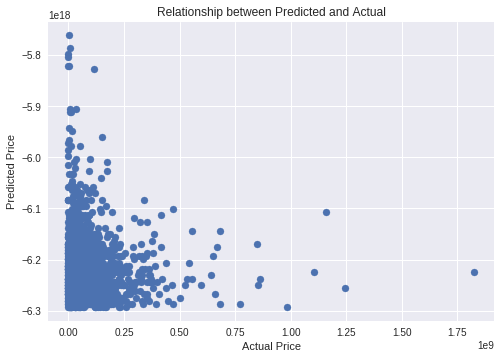

In [226]:
plt.scatter(Y_train,lm.predict(Xtrain)[:])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Relationship between Predicted and Actual")
plt.show()

In [227]:
from sklearn.metrics import r2_score
r2_score(Y_train,lm.predict(Xtrain)[:])

-2.7573897456311028e+21

In [228]:
from sklearn.metrics import r2_score
r2_score(y_validate,lm.predict(Xvalidate)[:])

-2.9496799723679682e+21